# Project: Count the Number of Coins in an image

**<div style="text-align: right"> [Total score : 10]</div>**

In this project, you will use OpenCV and sklearn to count the total value of all the coins in an image.


## The Data


Here is what an image that you will work on looks like:

'wget' is not recognized as an internal or external command,
operable program or batch file.


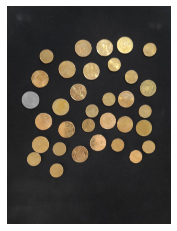

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

!wget -qO coins.jpg 'https://storage.googleapis.com/codehub-data/1-P-8-coins.jpg'
image = cv2.imread('coins.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

And here is what `data.csv` looks like:

In [2]:
import pandas as pd

coins_df = pd.read_csv('https://storage.googleapis.com/codehub-data/1-P-8-coins_data.csv')
coins_df.head()

,radius,mean_hue,mean_saturation,mean_value,label
0,1.767867,0.0,0.0,97.1,0
1,0.500100,0.0,0.0,94.5,0
2,1.118134,0.0,0.0,95.0,0
3,1.118134,0.0,0.0,97.5,0
4,1.000100,0.0,0.0,95.5,0


The features in the dataset are:

1. `radius`: radius of the minimum enclosing circle of a contour in pixels
2. `mean_hue`: mean of the hue of all the pixels inside a contour
3. `mean_saturation`: mean of the saturation of all the pixels inside a contour
4. `mean_value`: mean of the value of all the pixels inside a contour
5. `label`: the class the circle belongs to
    * Not a coin (class 0)
    * One rupee coin (class 1)
    * Two rupees coin (class 2)

The images and dataset are © Fuse.ai, 2019.

## Task Breakdown

Let's breakdown what you will do in this project. You will

1. Use color thresholding to mask out the black backgrounds in the image to form a mask of all foreground objects. [1 point]

2. Find contours on the mask of foreground objects. [1 point]

3. For each contour, find the radius of its minimum enclosing circle. [1 point]

4. Find the mean HSV values for each contours. [2 points]

5.  Use the data in `data.csv` to train a classifier of your choice that classifies circles based on their radii and mean HSV color values. [2 points]

6. Use this classifier to classify each circle in the given image (from step 3 and 4). [1 point]

7. Count the total money (in rupees) in the image. [2 points]

## Exercises

### Exercise 1: Mask out the background
<b><div style="text-align: right">[POINTS: 1]</div></b>
Use color filtering to build a mask of the foreground objects by thresholding out the black background. Use a suitable morphological operation to smooth the mask out if necessary. 

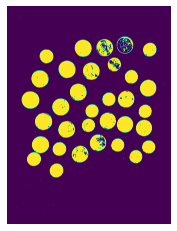

In [3]:
coins_mask = None

# YOUR CODE HERE

upper_bound = np.array([65, 68, 69])
lower_bound = np.array([230, 235, 240])

coins_mask = cv2.inRange(image,
                    upper_bound,
                    lower_bound
                        )

kernel = np.ones([3,3])
coins_mask = cv2.morphologyEx(coins_mask, cv2.MORPH_CLOSE, kernel)


plt.imshow(coins_mask)
plt.axis('off')
plt.show()

In [4]:

assert not coins_mask is None


### Exercise 2: Find all the contours in `coins_mask`
<b><div style="text-align: right">[POINTS: 1]</div></b>
Find all the contours in `coins_mask`.

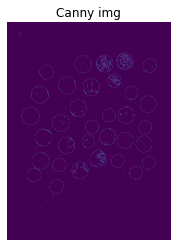

In [5]:
contours = None
# YOUR CODE HERE

gray_scaled = cv2.cvtColor(coins_mask, cv2.COLOR_BGR2RGB)
edged = cv2.Canny(gray_scaled,200,100)
plt.imshow(edged)
plt.title('Canny img')
plt.axis('off')
plt.show()


contours,_ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)



In [6]:
assert not contours is None
assert len(contours)


### Exercise 3: Find the radii of the minimum enclosing circles for each circle
<b><div style="text-align: right">[POINTS: 1]</div></b>
Find the radius of the minimum enclosing circle of each of the contour in `contours` and append each of the radii to the list `radii`.

In [7]:
radii = []

# YOUR CODE HERE

for each_counter in contours:
    (_, _), each_cont_radius = cv2.minEnclosingCircle(each_counter)
    radii.append(each_cont_radius)

In [8]:
assert len(radii)


### Exercise 4: Find mean HSV values
<b><div style="text-align: right">[POINTS: 2]</div></b>
Convert `image` to the HSV colorspace. For each contour, find the mean value of the Hue, Saturation and Value channels for the pixels inside the contour. Append the mean of HSV values to the lists `means_hue`, `means_saturation` and `means_value`.




In [9]:
means_hue = []
means_saturation = []
means_value = []

hsv_image = None

# YOUR CODE HERE


image = cv2.imread('coins.jpg')
hsv_image =  cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
for cnt in contours:
    contour_mask = np.zeros_like(coins_mask)
    contour_mask = cv2.drawContours(contour_mask, [cnt], -1, (255), -1)
    (mean_hue, mean_saturation, mean_value, _) = cv2.mean(hsv_image, mask=contour_mask)
    
    means_hue.append(mean_hue)
    means_saturation.append(mean_saturation)
    means_value.append(mean_value)

In [10]:
assert not hsv_image is None
assert len(means_hue)
assert len(means_saturation)
assert len(means_value)


### Exercise 5: Train a model on the data
<b><div style="text-align: right">[POINTS: 2]</div></b>
Use sklearn to train a classification model of your liking on the data.





In [11]:
classifier = None

# YOUR CODE HERE
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split


In [12]:
#dataset
data = coins_df

In [13]:
#separating features and labels
X = data[[
    'radius',
    'mean_hue',
    'mean_saturation',
    'mean_value'
]].values

y= data[[
    'label'
]]
print(X,y)

[[1.76786697e+00 0.00000000e+00 0.00000000e+00 9.71000000e+01]
 [5.00100017e-01 0.00000000e+00 0.00000000e+00 9.45000000e+01]
 [1.11813402e+00 0.00000000e+00 0.00000000e+00 9.50000000e+01]
 ...
 [1.80287564e+00 0.00000000e+00 0.00000000e+00 1.03363636e+02]
 [9.99999975e-05 1.20000000e+02 5.00000000e+00 1.05000000e+02]
 [9.99999975e-05 1.20000000e+02 5.00000000e+00 9.50000000e+01]]      label
0        0
1        0
2        0
3        0
4        0
..     ...
523      0
524      0
525      0
526      0
527      0

[528 rows x 1 columns]


In [14]:
#separating train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [15]:
#fitting SVM classifier model
classifier = svm.SVC()
classifier.fit(X_train,y_train)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [16]:
#testing SVM classifier model
predictions = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predictions)
print(f'accuracy = {accuracy:.4f}')

accuracy = 0.9717


In [17]:
import pickle
with open('model.pkl','wb') as f:
  pickle.dump(classifier,f)

In [18]:
assert not classifier is None


### Exercise 6: Classify the circles in the image
<b><div style="text-align: right">[POINTS: 1]</div></b>
Build a numpy array or a pandas dataframe using the features in the image you calculated above and run the classifier on it.

In [19]:
test_data = None # input data to the model
test_labels = None # output from the model

test_labels = []
with open('model.pkl','rb') as f:
  model = pickle.load(f)
# YOUR CODE HERE
test_data = pd.DataFrame({'radius':radii,
                          'mean_hue':means_hue,
                          'mean_saturation':means_saturation,
                          'mean_value':means_value})
test_labels = model.predict(test_data)
print(f'Test labels = {test_labels}')


Test labels = [0 0 0 ... 0 0 0]


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [20]:
assert not test_data is None
assert not test_labels is None


### Exercise 7: Count the total money in the image
<b><div style="text-align: right">[POINTS: 2]</div></b>
Using the labels predicted in the above step, calculate the total money in the image.

In [21]:
z = 0
o = 0
t = 0 

# YOUR CODE HERE
for i in test_labels:
    if i==0:
        pass
    elif i==1:
        o+= 1
    else:
        t+= 1

In [22]:
total_money = 0

# YOUR CODE HERE
total_money = o+(t*2)
print(f'Total money= Rs. {total_money}')

Total money= Rs. 19


In [23]:
assert total_money > 0
